# Desafio - Algoritmos de Classificação - Bank Marketing

No Aprendizado de Máquina e na estatística, a Classificação é o problema de identificar a qual de um conjunto de categorias (subpopulações) uma nova observação pertence, com base em um conjunto de dados de treinamento contendo observações cuja associação à categoria é conhecida. Exemplos de problemas de classificação são atribuir um determinado e-mail à classe "spam" ou "não spam" e atribuir um diagnóstico a um determinado paciente com base nas características observadas (sexo, pressão arterial, presença ou ausência de certos sintomas, etc.)

Neste notebook, será utilizado o [Bank Marketing Dataset](https://drive.google.com/drive/folders/13a_SPs445s_IkJ4phKSHEAUJTfDuQ03O?usp=sharing) do Kaggle para construir um modelo para prever se alguém fará um depósito ou não, dependendo em alguns atributos. É permitido o uso do algoritmo de Regressão Logística, como na demonstração, ou outro algoritmo da escolha de vocês. Após construir o modelo, é necessário avaliá-lo e ver como ele está performando para o nosso caso. 


##### **Considerações sobre o Bank Marketing Dataset**

Para determinar a probabilidade de um cliente realizar a um 'deposit', ou seja, um tipo de investimento, no qual o cliente aplica uma quantia pré-definida e partes do retorno financeiro obtidos pela instituição bancária são repassados ao cliente.

Objetivando uma melhor compreensão dos dados apresentados, a seguir será apresentada uma breve descrição das principais variáveis contidas neste banco de dados:


*   **Age:** idade do usuário;
*   **Job:** profissão do usuário (admin, blue-collar,   entrepreneur, housemaid, management e retired);
*   **Default:** O usuário está no com saldo negativo? (no ou yes); 
*   **Education:** nível educacional do usuário (primary, secondary, tertiary e unknown);
*   **Marital:**status civil do usuário (divorced, married, single e unknown);
*   **Housing:** O usuário tem um hipotéca? (no, yes,unknown)?

*   **Loan:** o usuário tem um empréstimo pessoal? (no, yes,unknown);
*   **Balance:** saldo do usuário na conta;











##### **Análises descritivas do banco de dados**

In [ ]:
# Importando as bibliotecas utilizadas na construção das análises e modelos:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objs as go
from numpy import mean
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importação do dataset e criação da visualização prévia:

df = pd.read_csv("/content/drive/MyDrive/UNI1500 - Cientista de Dados/bank.csv", sep =',',
                 dayfirst = True,
                 decimal = ',')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
# Verificando a existência de valores vazios no dataset:

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Apresentação do resumo das medidas-resumo:

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


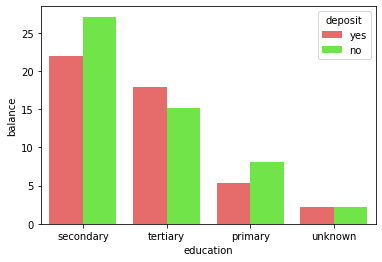

In [ ]:
# O gráfico a seguir apresenta a relação entre o nível educacional e o depósito.
# Podemos observar que os nos níveis educacionais maiores, existem um maior número de investimento.
# Com exceção nos níveis secundário e desconhido.

palette = ["#FA5858", "#64FE2E"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)

plt.show()

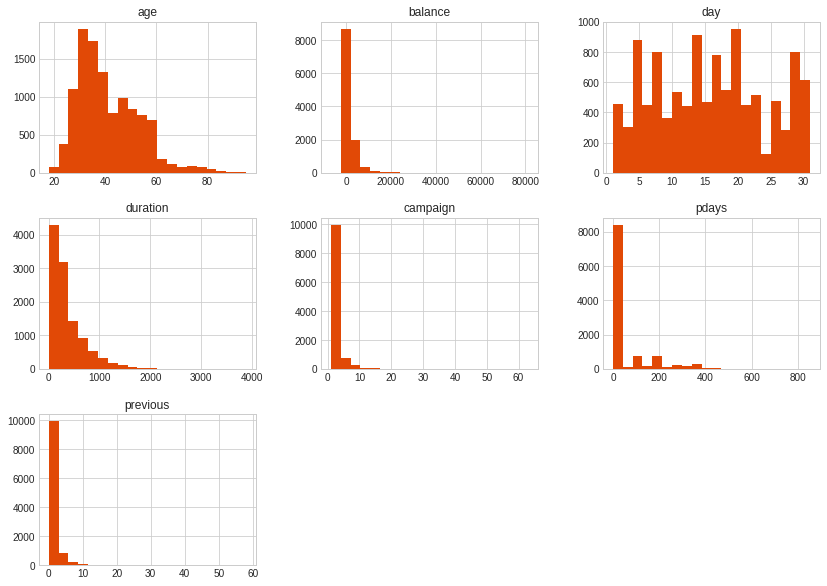

In [ ]:
# Os gráficos a seguir apresentam a distribuição das frequência das variáveis:

plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [ ]:
# Os boxplots a seguir apresentam a distribuição das pessoas que possuem depósitos.
# Considerando as profissões e idades.

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):traces.append(go.Box( y=yd, name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [ ]:
# O gráfico a seguir apresenta a distribuição dos usuários por status civil:

vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [ ]:
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [ ]:
df['education'] = df['education'].replace(['primary','secondary', 'tertiary', 'unknown'],[1, 2, 3,0])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['default','housing', 'loan','job','marital']
categorical_encoder = OneHotEncoder(handle_unknown='ignore')
categorical_encoder.fit(df[categorical_columns])

# Adicione as novas colunas aos dados
new_column_names = []
for idx, cat_column_name in enumerate(categorical_columns):
    values = categorical_encoder.categories_[idx]
    new_column_names += [f'{cat_column_name}_{value}' for value in values]

df.loc[:, new_column_names] = \
  categorical_encoder.transform(df[categorical_columns]).toarray()

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,59,admin.,married,2,no,2343,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,56,admin.,married,2,no,45,no,no,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,technician,married,2,no,1270,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,55,services,married,2,no,2476,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54,admin.,married,3,no,184,no,no,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,1,no,1,yes,no,cellular,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,services,married,2,no,733,no,no,unknown,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11159,32,technician,single,2,no,29,no,no,cellular,19,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11160,43,technician,married,2,no,0,no,yes,cellular,8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df = df.drop(columns=['job','marital','default','housing','loan','contact','day','month','campaign',
                      'poutcome','duration','education','pdays','previous'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, ['age']] = scaler.fit_transform(df[['age']])

In [ ]:
# Logistic Regression

X = df.drop(columns=['deposit'])
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
df

,age,balance,deposit,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,job_admin.,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,1.491505,2343,yes,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.239676,45,yes,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.019470,1270,yes,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.155733,2476,yes,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.071790,184,yes,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,1,no,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,733,no,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11159,-0.774958,29,no,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,0,no,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.columns.tolist()

['age',
 'balance',
 'deposit',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, ['age']] = scaler.fit_transform(df[['age']])

In [ ]:
h = features_to_use = [
    'age',
    'balance'
] + new_column_names
X_train = df[features_to_use].copy()

h


['age',
 'balance',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)

In [ ]:
df_s = X_train[:8929] 

X_train = df_s

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

Accuracy score: 0.5176892073443797


In [ ]:
baseline_accuracy_score = y_test.value_counts()[0] / len(y_test)

print(f'Model performance.  : {accuracy}')
print(f'Baseline performance: {baseline_accuracy_score}')

Model performance.  : 0.5176892073443797
Baseline performance: 0.5396327810120913
